Examen 2: Maestría en Descripción Estratégica
Caso de Estudio: MercadoMaule

Asumes el rol de Analista de Datos Senior en "MercadoMaule", un e-commerce en plena expansión en la Región del Maule. La empresa vende productos en tres categorías principales: 'Electrónica', 'Hogar' y 'Ropa'. La gerencia necesita un análisis profundo de la data de operaciones para optimizar la logística y la estrategia de precios.

In [1]:
#Conjunto de Datos:
# Ejecuta el siguiente código para generar tu DataFrame de trabajo.
# Las distribuciones han sido diseñadas para ser realistas y desafiantes.
import pandas as pd
import numpy as np

np.random.seed(123)

# Generar datos base
n_total = 500
categorias = ['Electrónica', 'Hogar', 'Ropa']
prob_categorias = [0.25, 0.4, 0.35]
df = pd.DataFrame({
    'categoria_producto': np.random.choice(categorias, n_total, p=prob_categorias)
})

# Diccionarios para almacenar los datos
valor_orden = {}
tiempo_entrega = {}
rating = {}

# Electrónica: Valor alto, alta varianza, asimetría positiva
valor_orden['Electrónica'] = np.random.gamma(shape=3, scale=80000, size=(df['categoria_producto'] == 'Electrónica').sum()).astype(int)
tiempo_entrega['Electrónica'] = np.random.normal(loc=72, scale=12, size=(df['categoria_producto'] == 'Electrónica').sum())
rating['Electrónica'] = np.random.normal(loc=4.1, scale=0.8, size=(df['categoria_producto'] == 'Electrónica').sum())

# Hogar: Valor moderado, distribución normal, predecible
valor_orden['Hogar'] = np.random.normal(loc=50000, scale=15000, size=(df['categoria_producto'] == 'Hogar').sum()).astype(int)
# Tiempo de entrega muy consistente (baja curtosis)
tiempo_entrega['Hogar'] = np.random.uniform(low=40, high=56, size=(df['categoria_producto'] == 'Hogar').sum())
rating['Hogar'] = np.random.normal(loc=4.5, scale=0.4, size=(df['categoria_producto'] == 'Hogar').sum())

# Ropa: Valor bajo, pero con tiempo de entrega muy variable (alta curtosis)
valor_orden['Ropa'] = np.random.lognormal(mean=np.log(20000), sigma=0.5, size=(df['categoria_producto'] == 'Ropa').sum()).astype(int)
# Tiempo de entrega polarizado: o muy rápido o muy lento
entregas_rapidas = np.random.normal(loc=24, scale=4, size=int((df['categoria_producto'] == 'Ropa').sum() * 0.8))
entregas_lentas = np.random.normal(loc=120, scale=10, size=int((df['categoria_producto'] == 'Ropa').sum() * 0.2))
tiempo_entrega['Ropa'] = np.concatenate([entregas_rapidas, entregas_lentas])
np.random.shuffle(tiempo_entrega['Ropa'])
rating['Ropa'] = np.random.choice([3, 4, 5], size=(df['categoria_producto'] == 'Ropa').sum(), p=[0.15, 0.35, 0.5])


# Asignar los datos al DataFrame
df['valor_orden_clp'] = 0
df['tiempo_entrega_horas'] = 0.0
df['rating_cliente'] = 0.0

for cat in categorias:
    mask = df['categoria_producto'] == cat
    df.loc[mask, 'valor_orden_clp'] = valor_orden[cat]
    df.loc[mask, 'tiempo_entrega_horas'] = tiempo_entrega[cat]
    df.loc[mask, 'rating_cliente'] = rating[cat]

# Limpiar valores imposibles
df['valor_orden_clp'] = df['valor_orden_clp'].clip(lower=1000)
df['rating_cliente'] = df['rating_cliente'].clip(1, 5)

Pregunta 1: Análisis de la Experiencia del Cliente (2 Puntos)

El equipo de Producto quiere entender la percepción de los clientes sobre los productos de la categoría 'Hogar'.

a) Para la variable rating_cliente en la categoría 'Hogar', calcula el rango (máximo - mínimo).

b) Encuentra el percentil 85 del rating. ¿Qué significa este valor en términos prácticos?

c) Determina el rango de ratings que contiene el 30% central de los datos (es decir, entre el percentil 35 y el 65). ¿Qué te dice la estrechez de este rango sobre la consistencia de la experiencia del cliente en esta categoría?

In [2]:
# Primero necesito observar la data a priori
df.info()
df.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   categoria_producto    500 non-null    object 
 1   valor_orden_clp       500 non-null    int64  
 2   tiempo_entrega_horas  500 non-null    float64
 3   rating_cliente        500 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


,categoria_producto,valor_orden_clp,tiempo_entrega_horas,rating_cliente
0,Ropa,13719,15.830132,5.000000
1,Hogar,44366,54.690954,4.474369
2,Electrónica,155406,75.359323,4.069343
3,Hogar,52274,41.249378,4.317857
4,Ropa,9074,21.579562,5.000000
5,Hogar,24035,53.638669,5.000000


In [2]:
# a) Para la variable rating_cliente en la categoría 'Hogar', calcula el rango (máximo - mínimo).
rating_hogar  = df[(df['categoria_producto']  ==  'Hogar')]['rating_cliente']
rango_hogar = np.max(rating_hogar)  - np.min(rating_hogar)
print (f'El rango de la categoría hogar es: {rango_hogar}')
# Este resultado nos indica con claridad que los datos dentro de esa categoría no están tan dispersos, es decir, que la puntuación que le dan los clientes oscila entre un rango pequeño de datos.

El rango de la categoría hogar es: 1.6777622879872625


In [3]:
# b) Encuentra el percentil 85 del rating. ¿Qué significa este valor en términos prácticos?
percentil_85 = np.percentile(rating_hogar,85)
print (f'El percentil 85 de los datos de la categoría hogar es: {percentil_85}')
# Esto significa que el 85% de las puntuaciones de la categoría hogar son menores o iguales a 4.89, y a su vez, que solo un 15% es superior a esto.

El percentil 85 de los datos de la categoría hogar es: 4.898085611968032


In [4]:
# c) Determina el rango de ratings que contiene el 30% central de los datos (es decir, entre el percentil 35 y el 65). ¿Qué te dice la estrechez de este rango sobre la consistencia de la experiencia del cliente en esta categoría?
percentil_35  = np.percentile(rating_hogar,35)
percentil_65  = np.percentile(rating_hogar,65)
print (f'Los límites del 30% central de las calificaciones son: {percentil_35} y {percentil_65}')
# Esto nos indica que el 30% central de las calificaciones del centro se encuentran entre 4.33 y 4.71, puedo interpretar esto con que nuestros consumidores están contentos pero aún así les falta algo para poder dar le máximo de calificación, algo pequeño, hay que investigar qué puede marcar la diferencia.


Los límites del 30% central de las calificaciones son: 4.335834758640021 y 4.717606013619184


Pregunta 2: Perfiles de Riesgo y Oportunidad (2.5 Puntos)

El equipo de Finanzas quiere entender el perfil de las diferentes categorías para gestionar el inventario y predecir ingresos.

a) Compara la distribución de valor_orden_clp para 'Electrónica' vs. 'Hogar'. Calcula y, más importante, interpreta la asimetría de ambas. ¿Qué categoría tiene más "sorpresas" de ventas de alto valor? ¿Qué implica esto para la gestión de inventario?

b) Ahora, compara la distribución de tiempo_entrega_horas para 'Hogar' vs. 'Ropa'. Calcula e interpreta la curtosis de ambas. ¿Qué categoría tiene una logística más predecible? ¿Qué significa una curtosis alta en el contexto de la promesa de entrega a un cliente?

In [6]:
df.head(3)
valor_electronica = df[(df['categoria_producto']=='Electrónica')]['valor_orden_clp']
valor_hogar = df[(df['categoria_producto']=='Hogar')]['valor_orden_clp']
# para calcular la distribución, utilizaré el coeficiente de variabilidad.
variacion_electronica = (np.std(valor_electronica)/np.mean(valor_electronica))*100
variacion_hogar = (np.std(valor_hogar)/np.mean(valor_hogar))*100
print (f'El coeficiente de variación de los valores de las ventas de electrónica es de {variacion_electronica} y el de hogar es de {variacion_hogar}')

El coeficiente de variación de los valores de las ventas de electrónica es de 50.3265840548628 y el de hogar es de 29.164748450271954


In [7]:
from scipy.stats import skew
asimetria_electronica = skew(valor_electronica)
asimetria_hogar = skew(valor_hogar)

print (f'La asimetría de el valor de las ventas de electrónica es de {asimetria_electronica} y el de hogar es de {asimetria_hogar}')
# Esto nos indica que el valor de las ventas de electrónica están sesgadas a la derecha, es decir, el valor de las ventas de esta categoría se concentra en la parte izquierda de la mediana, lo que implica menores valores de las ventas pero hay algunas sorpresas, es decir algunos clientes (pocos) que han comprado grandes valores. On the other hand, los valors de las ventas que se llevaron a cabo de la categoría hogar, está sesgada a la izquierda, lo que nos indica que los datos se distribuyen principalmene en el lado derecho, tenemos grandes valores de ventas concentrados en este grupo pero algunos que compran muy pocos en esta categoría.

La asimetría de el valor de las ventas de electrónica es de 0.6610821605242316 y el de hogar es de -0.2534236941677353


In [11]:
# b) Ahora, compara la distribución de tiempo_entrega_horas para 'Hogar' vs. 'Ropa'. Calcula e interpreta la curtosis de ambas.
# ¿Qué categoría tiene una logística más predecible? ¿Qué significa una curtosis alta en el contexto de la promesa de entrega a un cliente?

from scipy.stats import kurtosis
tiempo_hogar  = df[(df['categoria_producto']  ==  'Hogar')]['tiempo_entrega_horas']
tiempo_ropa = df[(df['categoria_producto']  ==  'Ropa')]['tiempo_entrega_horas']
curtosis_hogar  = kurtosis(tiempo_hogar)
curtosis_ropa = kurtosis(tiempo_ropa)
print (f'La Curtosis de el tiempo de entrega de los productos "Hogar es de {curtosis_hogar} y la Curtosis del tiempo de entrega de la ropa es de {curtosis_ropa}')
# En relación a los productos del hogar, se observa una curtosis platicúrtica al ser menor que 0, eso quiere decir, que los tiempos de entrega de los productos no están concentrados en un punto específico sino que se reparten por toda la distribución, y hay pocas posibilidades de tener tiempos de entrega demasiado altos o demasiado bajos.
# Ahora bien, en relaciñon al tiempo de enetrega de la ropa, tenemos una agrupación de los tiempos bastante más concentrada en el centro, y con posibles cisnes negros, ya que las colas son más pesadas, es decir, podríamos estar ante algunas demoras excesivas.

La Curtosis de el tiempo de entrega de los productos "Hogar es de -1.2942518869846733 y la Curtosis del tiempo de entrega de la ropa es de 0.4489169256272727


**Pregunta 3: El Informe del Consultor (2.5 Puntos)**

Este es tu desafío final. La ambigüedad es intencional. En el mundo real, nadie te pide calcular la curtosis; te piden resolver un problema.

Situación: El Jefe de Logística te llama a su oficina y te dice:

"Estoy muy preocupado por la operación de la categoría 'Ropa'. Mis supervisores me dicen que los tiempos de entrega están 'bien en promedio', pero mi bandeja de entrada está llena de quejas de clientes furiosos por demoras extremas, mientras que otros nos felicitan en redes sociales por la rapidez. No entiendo qué está pasando. Necesito un diagnóstico completo y claro. ¿Nuestra logística para 'Ropa' es un desastre o no? Preséntame un informe con tu análisis y recomendaciones."

Tu tarea:
Prepara un informe completo para el Jefe de Logística. No hay sub-preguntas. Eres el analista senior. Debes decidir qué métricas calcular, qué visualizaciones crear y qué conclusiones y recomendaciones presentar. Se evaluará la totalidad de tu análisis: tu habilidad para diagnosticar el problema de raíz usando estadísticas descriptivas y para comunicar la solución de forma clara y convincente.



In [12]:
df.head(2)


,categoria_producto,valor_orden_clp,tiempo_entrega_horas,rating_cliente
0,Ropa,13719,15.830132,5.000000
1,Hogar,44366,54.690954,4.474369


In [ ]:
from scipy.stats import kurtosis

tiempo_ropa = df[(df['categoria_producto']  ==  'Ropa')]['tiempo_entrega_horas']
curtosis_ropa = kurtosis(tiempo_ropa)
print (f'La Curtosis de el tiempo de entrega de los productos "Hogar es de {curtosis_hogar} y la Curtosis del tiempo de entrega de la ropa es de {curtosis_ropa}')

In [15]:
media_ropa  = np.mean(tiempo_ropa)
mediana_ropa  = np.median(tiempo_ropa)
print (f'La media de los tiempos de entrega de la ropa es de {media_ropa} y la mediana es {mediana_ropa}')
# Hay una diferencia tremenda, por lo que hay outliers que están alterando nuestros datos, veamoslos en profundidad.

La media de los tiempos de entrega de la ropa es de 42.41287057633244 y la mediana es 24.018245810294047


In [18]:
from scipy.stats import skew
asimetria_tiempos_ropa  = skew(tiempo_ropa)
curtosis_ropa = kurtosis(tiempo_ropa)
print (f'La Curtosis de el tiempo de la ropa es de {curtosis_ropa} y la asimetria es de {asimetria_tiempos_ropa}')

La Curtosis de el tiempo de la ropa es de 0.4489169256272727 y la asimetria es de 1.5228266618230297


In [ ]:
# En relación a los tiempos de entrega de la ropa, el 50% de las entregas se demoraron 24 horas o menos. Ahora bien, ¿Qué ocurre con el otro 50 %?
# Al calcular la asimetria de la distribución de las horas de entrega, nos dimos cuenta de que los datos se concentran en la parte izquierda, pero tenemos algunos valores muy extremos es decir entregas que se demoraron mucho que disparan el promedio de las horas de entrega.
#  Gracias a la Kurtosis, sabemos que los datos están concentrados en el centro, pero hay riesgo de que los cisnes negros (como fue ne este caso) alteren los datos, haciendo las colas más pesadas.
# Por lo tanto, todo esto apunta a que la experiencia por lo general es buena, nos demoramos como mediana 24 horas, pero hay que analizar qué está pasando con los SKU que se demoran tanto.

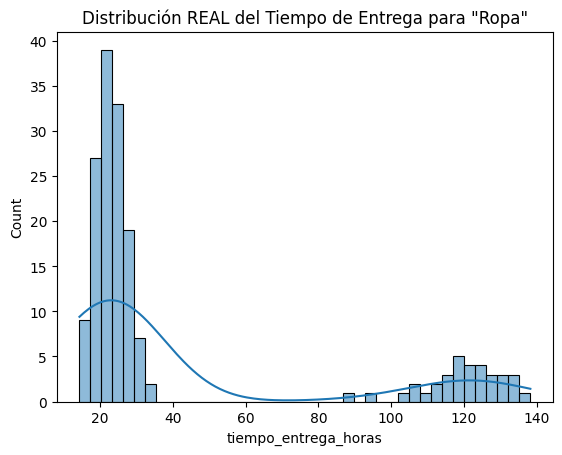

In [19]:
# ESTO ME FALTÓ, EN LA CORRECCIÓN ME LO DIJERON.
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df[df['categoria_producto'] == 'Ropa'], x='tiempo_entrega_horas', kde=True)
plt.title('Distribución REAL del Tiempo de Entrega para "Ropa"')
plt.show()